<a href="https://colab.research.google.com/github/DAS-H/cs666student/blob/main/CS666_Assignment_5_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

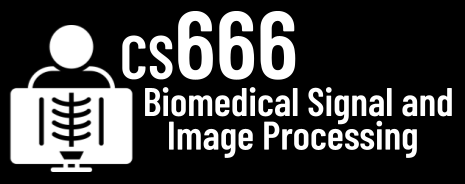
#Assignment 5

In [5]:
# NAME:Omkar Dash

In [4]:
# In this assignment, we will visualize and explore a CT scan!

In [6]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
# we are using pydicom, so lets install it!
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.1 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [8]:
# Use wget to download https://cs666.org/data/ct.zip!
# This is a CT scan of an arm in DICOM format.

In [9]:
!wget https://cs666.org/data/ct.zip


--2024-04-16 03:05:33--  https://cs666.org/data/ct.zip
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5847706 (5.6M) [application/zip]
Saving to: ‘ct.zip’

ct.zip              100%[===================>]   5.58M  --.-KB/s    in 0.05s   

2024-04-16 03:05:33 (106 MB/s) - ‘ct.zip’ saved [5847706/5847706]



In [10]:
# Then use the following snippet to extract the data.

In [11]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [12]:
# 1) Let's explore the data using the Files panel on the left.
# TODO: How many slices are there?

In [13]:
# TODO: YOUR_ANSWER--- 220 slices

In [14]:
# 2) Let's visualize the data with SliceDrop!
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [15]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

In [16]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [17]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click.

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [18]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [19]:
from pydicom import dcmread

In [24]:
import os
import numpy as np
import pydicom

# Specify the directory where your DICOM files are stored
dir_path = 'ct'

# List only files that end with '.dcm'
dicom_files = [f for f in os.listdir(dir_path) if f.endswith('.dcm')]

# Ensure the files are sorted; this might be necessary if the file naming convention affects order
dicom_files.sort()

# Read the DICOM files and stack them into a numpy array
dicom_array = np.stack([pydicom.dcmread(os.path.join(dir_path, file)).pixel_array for file in dicom_files])

# Display the shape of the numpy array
print("Shape of the DICOM array:", dicom_array.shape)

# Find the minimum non-zero pixel value in the DICOM array
min_non_zero = dicom_array[dicom_array != 0].min()
print("Minimum non-zero pixel value:", min_non_zero)


Shape of the DICOM array: (220, 454, 512)
Minimum non-zero pixel value: 624


In [ ]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

In [61]:
from matplotlib import pyplot
axial = 100
coronal = 147
sagittal = 119




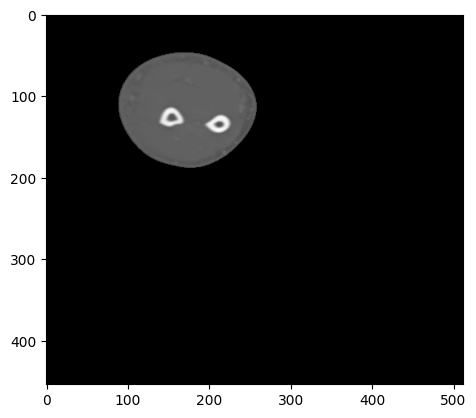

In [28]:
# TODO: YOUR CODE FOR AXIAL
pyplot.imshow(dicom_array[axial], cmap='gray')

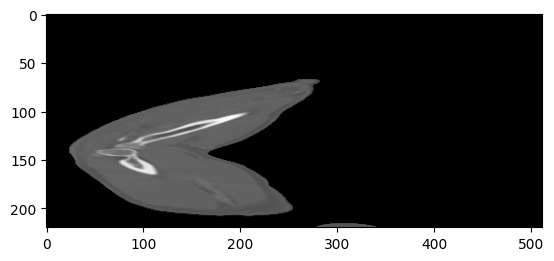

In [62]:
# TODO: YOUR CODE FOR SAGITTAL
pyplot.imshow(dicom_array[:, coronal, :], cmap='gray')

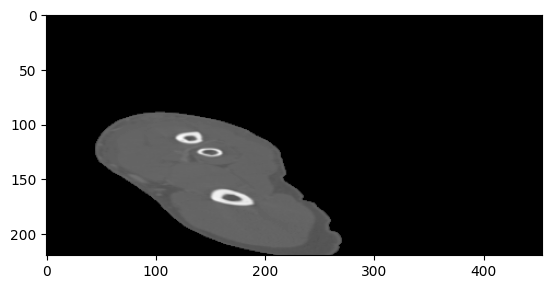

In [63]:
# TODO: YOUR CODE FOR CORONAL
pyplot.imshow(dicom_array[:, :, sagittal], cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

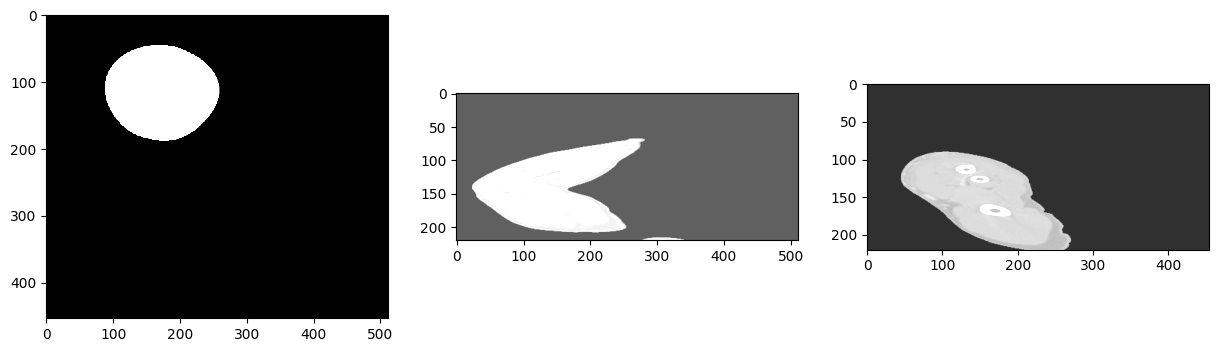

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Adjust and display each slice
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Function to apply window/level adjustments
def apply_window_level(axis_index, title,  pixels, level, window, rescale):
    # vmin = level - window / 2
    # vmax = level + window / 2
    # return np.clip(pixels, vmin, vmax)

  vmin = level - window/2
  vmax = level + window/2
  ax[axis_index].imshow(pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)


#Example window/level values
window_level_settings = {
    "axial": (40, 80, 0),
    "coronal": (400, 1600, 200),
    "sagittal": (400, 1600, -100)
}

# Load your DICOM data (assuming 'dicom_array' is already loaded)
# ...

apply_window_level(0, 'Axial View', dicom_array[axial], *window_level_settings['axial'])
apply_window_level(1, 'Coronal; View', dicom_array[:, coronal, :], *window_level_settings['coronal'])
apply_window_level(2, 'Sagittal View', dicom_array[:, :, sagittal], *window_level_settings['sagittal'])

# Axial
# axial_image = apply_window_level(dicom_array[axial], *window_level_settings['axial'])
# ax[0].imshow(axial_image, cmap='gray')

# ax[0].set_title('Axial View')

# # Coronal
# coronal_image = apply_window_level(dicom_array[:, coronal, :], *window_level_settings['coronal'])
# ax[1].imshow(coronal_image, cmap='gray')
# ax[1].set_title('Coronal View')

# # Sagittal
# sagittal_image = apply_window_level(dicom_array[:, :, sagittal], *window_level_settings['sagittal'])
# ax[2].imshow(sagittal_image, cmap='gray')
# ax[2].set_title('Sagittal View')

plt.show()


In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

level=30
window=410
rescale=-1024


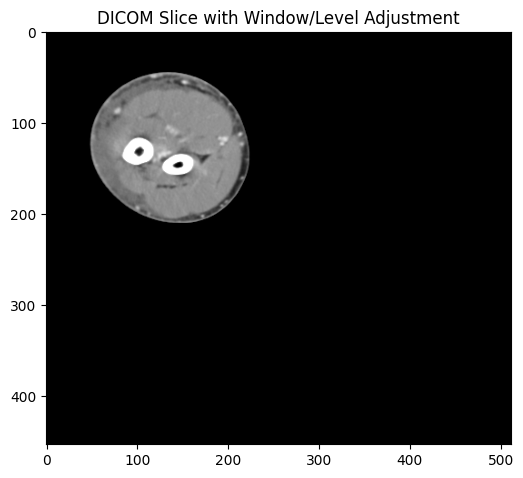

Window Center: 30, Window Width: 410, Rescale Intercept: -1024


In [65]:
# TODO: YOUR CODE
import matplotlib.pyplot as plt
import numpy as np
from pydicom import dcmread

# Function to load DICOM data and extract window/level settings
def load_dicom_with_window_level(filepath):
    dicom = dcmread(filepath)
    window_center = dicom.WindowCenter if 'WindowCenter' in dicom else None
    window_width = dicom.WindowWidth if 'WindowWidth' in dicom else None
    rescale_intercept = dicom.RescaleIntercept if 'RescaleIntercept' in dicom else 0
    return dicom.pixel_array, window_center, window_width, rescale_intercept

# Function to apply window/level adjustments
def apply_window_level(pixels, level, window, rescale):
    if level is None or window is None:
        return pixels  # If no window/level information, return the original image
    vmin = level - window / 2
    vmax = level + window / 2
    return np.clip(pixels + rescale, vmin, vmax)

# Choose a slice to display
slice_path = "/content/ct/IM-0001-0120.dcm"  # Update the path to your specific DICOM file
pixels, level, window, rescale = load_dicom_with_window_level(slice_path)
print(f"level={level}")
print(f"window={window}")
print(f"rescale={rescale}")
# Display the slice with window/level adjustments
plt.figure(figsize=(6, 6))
adjusted_image = apply_window_level(pixels, level, window, rescale)
plt.imshow(adjusted_image, cmap='gray')
plt.title('DICOM Slice with Window/Level Adjustment')
plt.show()

# Print window and level values
print(f"Window Center: {level}, Window Width: {window}, Rescale Intercept: {rescale}")


In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

Text(0.5, 1.0, 'DICOM Slice with Window/Level Adjustment')

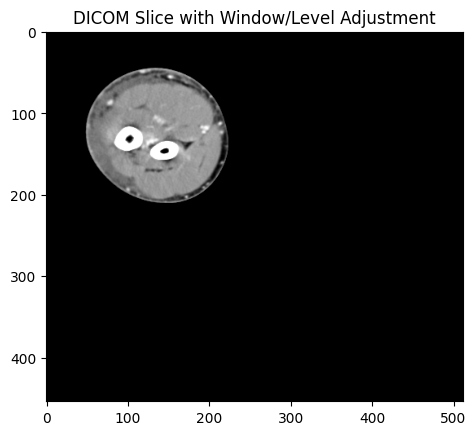

In [66]:
# TODO: YOUR CODE
adjusted_image = apply_window_level(pixels,60 ,300 ,-990 )
plt.imshow(adjusted_image, cmap='gray')
plt.title('DICOM Slice with Window/Level Adjustment')

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER --- Values that make sence to me are level=60,window=300,rescale=-990
# Cause they provide a proper atmosphere and contrast for a clear image

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [ ]:
# plt.figure(figsize=(18, 5))

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

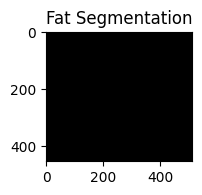

In [ ]:
# # TODO: YOUR CODE TO SEGMENT FAT
# # Segmenting Fat: HU range approximately -100 to -50
# fat_lower_threshold = -100
# fat_upper_threshold = -50

# # Create a mask for fat
# fat_mask = np.zeros_like(hu_volume, dtype=np.int16)
# fat_mask[(hu_volume >= fat_lower_threshold) & (hu_volume <= fat_upper_threshold)] = 1

# # Now `fat_mask` is a segmentation mask for fat tissue


# # Fat
# plt.subplot(1, 3, 1)
# plt.imshow(fat_mask[axial], cmap='gray')
# plt.title('Fat Segmentation')


# plt.show()

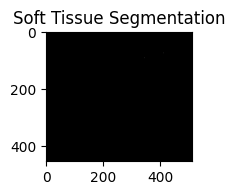

In [ ]:
# # TODO: YOUR CODE TO SEGMENT SOFT TISSUE
# # Segmenting Soft Tissue: HU range approximately 10 to 60
# soft_tissue_lower_threshold = 10
# soft_tissue_upper_threshold = 60

# # Create a mask for soft tissue
# soft_tissue_mask = np.zeros_like(hu_volume, dtype=np.int16)
# soft_tissue_mask[(hu_volume >= soft_tissue_lower_threshold) & (hu_volume <= soft_tissue_upper_threshold)] = 1

# # Now `soft_tissue_mask` is a segmentation mask for soft tissue
# # Soft Tissue
# plt.subplot(1, 3, 2)
# plt.imshow(soft_tissue_mask[axial], cmap='gray')
# plt.title('Soft Tissue Segmentation')

# plt.show()

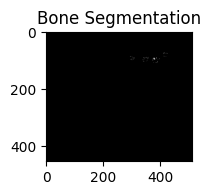

In [ ]:
# # TODO: YOUR CODE TO SEGMENT BONES
# # Segmenting Bones: HU range approximately 700 to 3000
# bone_lower_threshold = 700
# bone_upper_threshold = 3000

# # Create a mask for bones
# bone_mask = np.zeros_like(hu_volume, dtype=np.int16)
# bone_mask[(hu_volume >= bone_lower_threshold) & (hu_volume <= bone_upper_threshold)] = 1

# # Now `bone_mask` is a segmentation mask for bone tissue
# # Bone
# plt.subplot(1, 3, 3)
# plt.imshow(bone_mask[axial], cmap='gray')
# plt.title('Bone Segmentation')

# plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

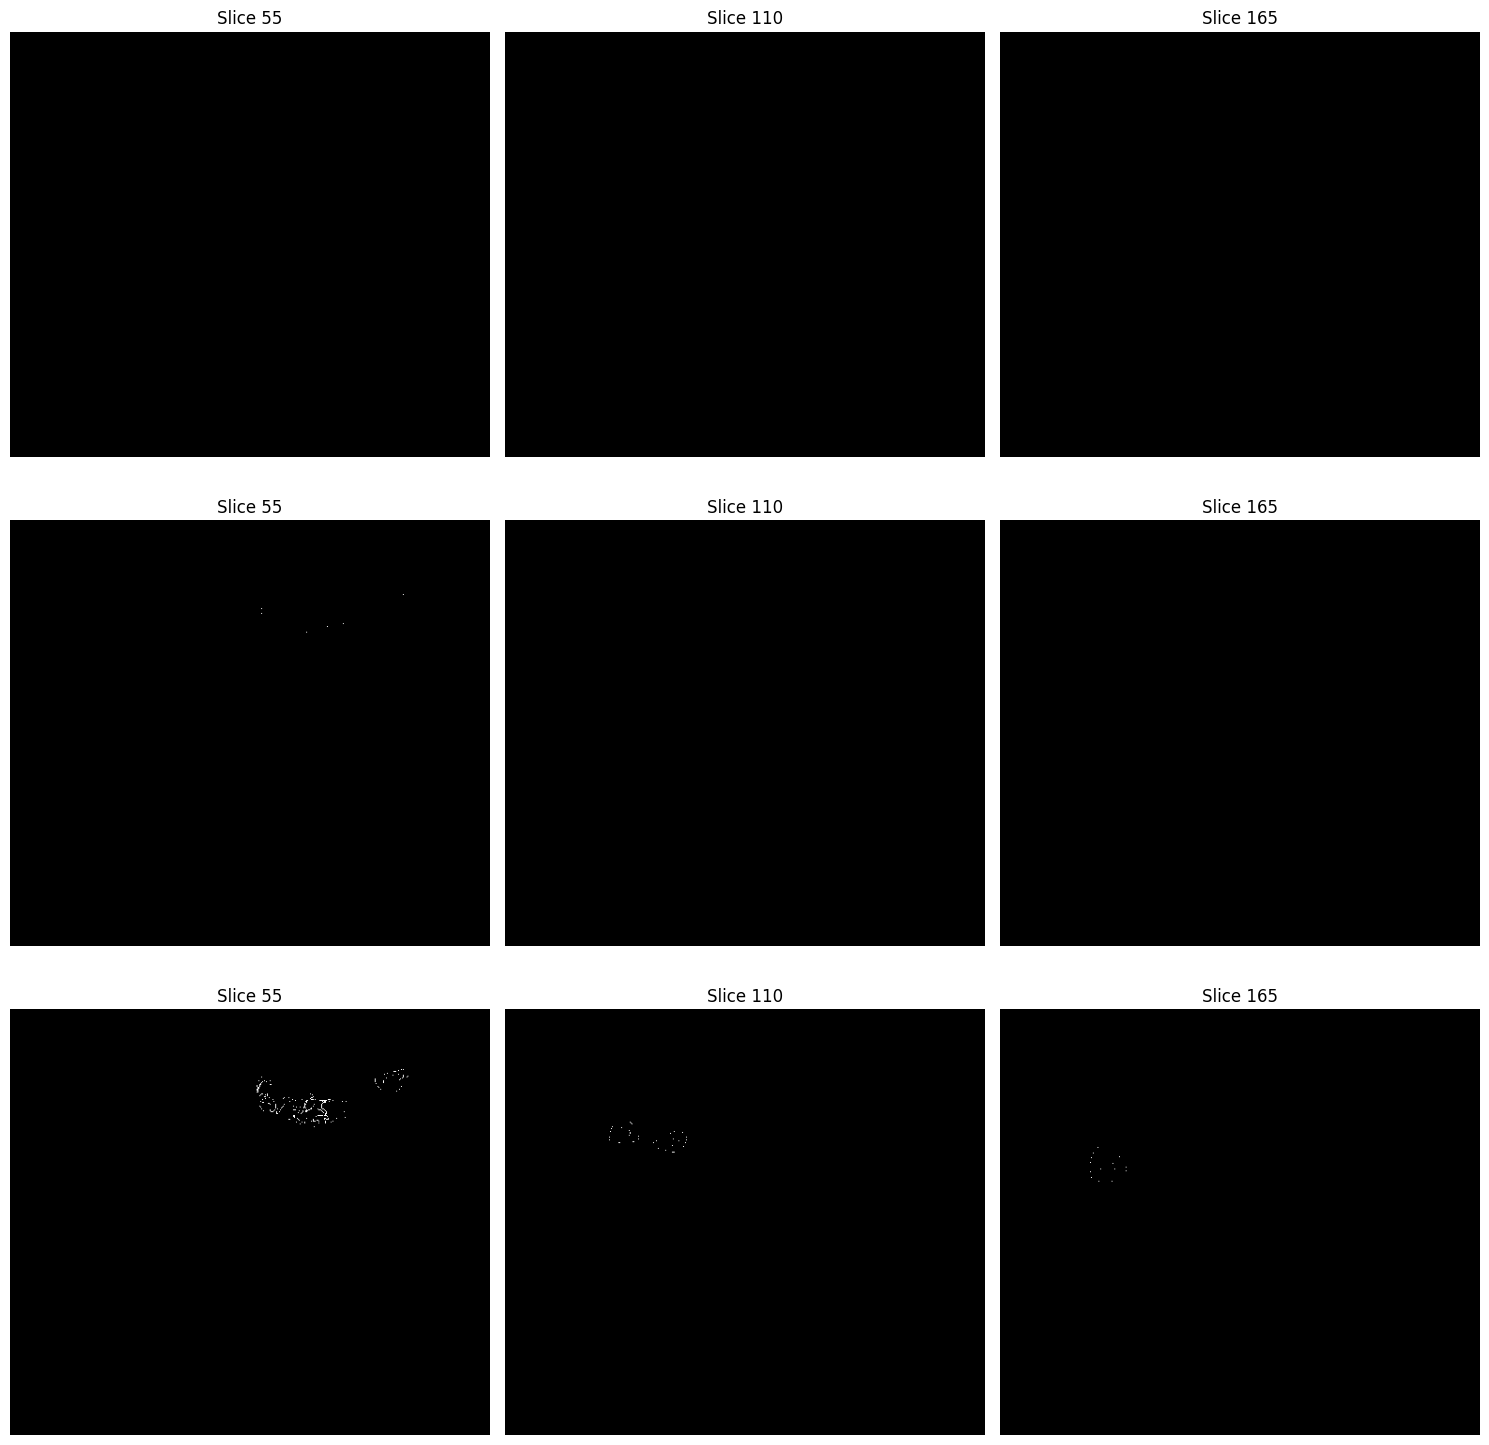

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming 'dicom_array' is your loaded DICOM volume
# # First, we need to convert the pixel values to HU
# def convert_to_hu(dicom_array, intercept, slope):
#     return dicom_array * slope + intercept
# rescale_intercept= 70
# rescale_slope= 45
# hu_volume = convert_to_hu(dicom_array, rescale_intercept, rescale_slope)

# # Define thresholds for different tissues
# thresholds = {
#     'fat': (-100, -50),
#     'soft_tissue': (10, 60),
#     'bone': (700, 3000)
# }

# # Function to create a mask based on thresholds
# def create_mask(volume, lower_threshold, upper_threshold):
#     mask = np.zeros_like(volume, dtype=np.int16)
#     mask[(volume >= lower_threshold) & (volume <= upper_threshold)] = 1
#     return mask

# # Create masks for each tissue type
# masks = {tissue: create_mask(hu_volume, *thresholds[tissue]) for tissue in thresholds}

# # Function to visualize three slices from each mask
# def visualize_masks(masks, slice_numbers):
#     fig, axes = plt.subplots(3, 3, figsize=(15, 15))
#     for i, (tissue, mask) in enumerate(masks.items()):
#         for j, slice_number in enumerate(slice_numbers):
#             axes[i, j].imshow(mask[slice_number], cmap='gray')
#             if j == 0:
#                 axes[i, j].set_ylabel(f'{tissue.capitalize()}')
#             axes[i, j].set_title(f'Slice {slice_number}')
#             axes[i, j].axis('off')
#     plt.tight_layout()
#     plt.show()

# # Choose slices to showcase for each structure
# slice_numbers = [int(hu_volume.shape[0] * ratio) for ratio in [0.25, 0.5, 0.75]]

# # Visualize the masks
# visualize_masks(masks, slice_numbers)


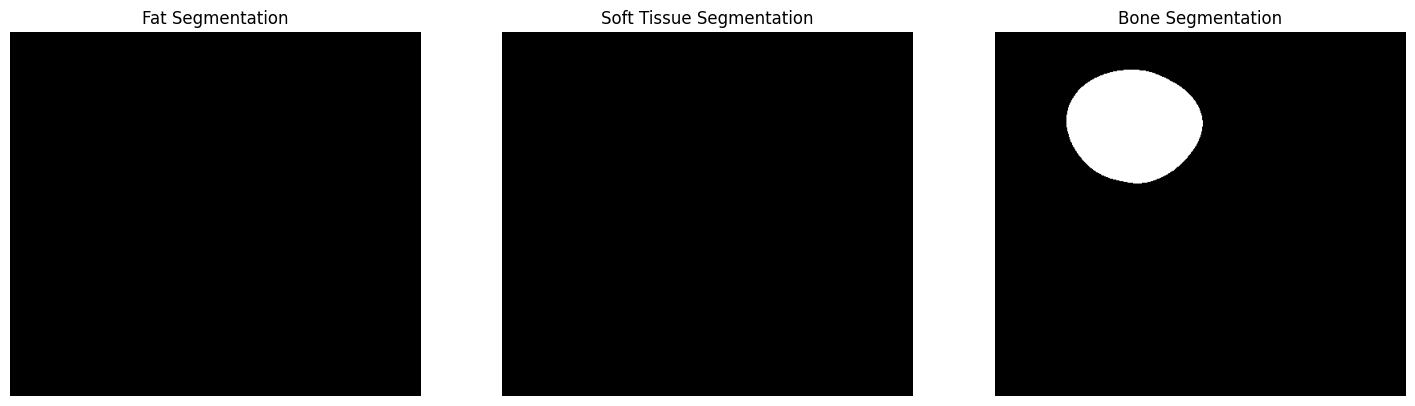

In [68]:
# import matplotlib.pyplot as plt
# import numpy as np

# def segment_tissue(hu_volume, lower_threshold, upper_threshold):
#     mask = np.zeros_like(hu_volume, dtype=np.int16)
#     mask[(hu_volume >= lower_threshold) & (hu_volume <= upper_threshold)] = 1
#     return mask

# # Assuming 'dicom_array' is your DICOM volume data
# # and 'axial' is the index of the axial slice you want to visualize.

# # Load your DICOM files and convert pixel values to Hounsfield Units
# # Replace 'dicom_array' with your actual DICOM volume data
# # You might need to perform some preprocessing to convert pixel values to Hounsfield Units
# hu_volume = dicom_array

# # Define threshold ranges for each tissue type
# fat_range = (-100, -50)
# soft_tissue_range = (10, 60)
# bone_range = (700, 3000)

# # Segment tissues using dynamic thresholds
# fat_mask = segment_tissue(hu_volume, fat_range[0], fat_range[1])
# soft_tissue_mask = segment_tissue(hu_volume, soft_tissue_range[0], soft_tissue_range[1])
# bone_mask = segment_tissue(hu_volume, bone_range[0], bone_range[1])

# # Now create a single figure with subplots for each type of tissue segmentation
# plt.figure(figsize=(18, 6))

# # Fat segmentation subplot
# plt.subplot(1, 3, 1)
# plt.imshow(fat_mask[axial], cmap='gray')
# plt.title('Fat Segmentation')
# plt.axis('off')  # Hide the axis labels and ticks

# # Soft tissue segmentation subplot
# plt.subplot(1, 3, 2)
# plt.imshow(soft_tissue_mask[axial], cmap='gray')
# plt.title('Soft Tissue Segmentation')
# plt.axis('off')  # Hide the axis labels and ticks

# # Bone segmentation subplot
# plt.subplot(1, 3, 3)
# plt.imshow(bone_mask[axial], cmap='gray')
# plt.title('Bone Segmentation')
# plt.axis('off')  # Hide the axis labels and ticks

# plt.show()


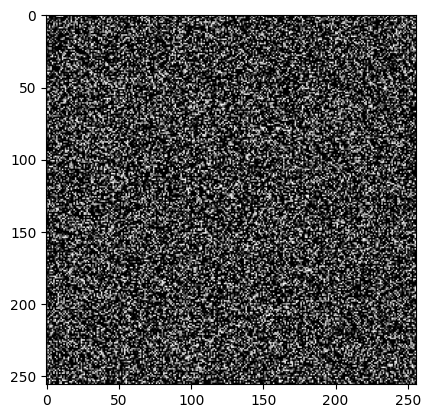

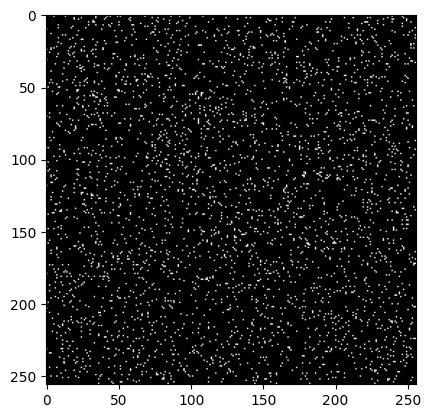

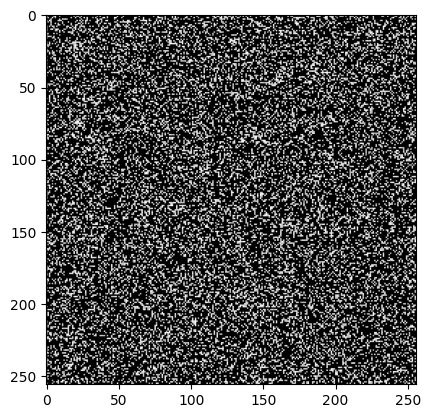

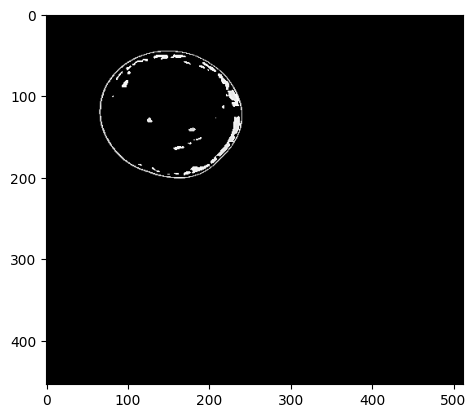

In [73]:

fat_segement_range = (80, 1000)

fat_mask = dicom_array.copy()
fat_mask = fat_mask.astype(np.int16)
fat_mask[np.logical_or(fat_mask < fat_segement_range[0], fat_mask > fat_segement_range[1])] = 0

plt.imshow(fat_mask[110, :, :], cmap='gray')
plt.show()


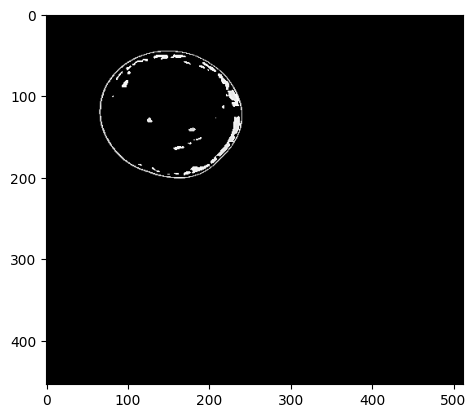

In [74]:

soft_tissue_segement_range = (1000, 1100)

fat_mask = dicom_array.copy()
fat_mask = fat_mask.astype(np.int16)
fat_mask[np.logical_or(fat_mask < fat_segement_range[0], fat_mask > fat_segement_range[1])] = 0

plt.imshow(fat_mask[110, :, :], cmap='gray')
plt.show()


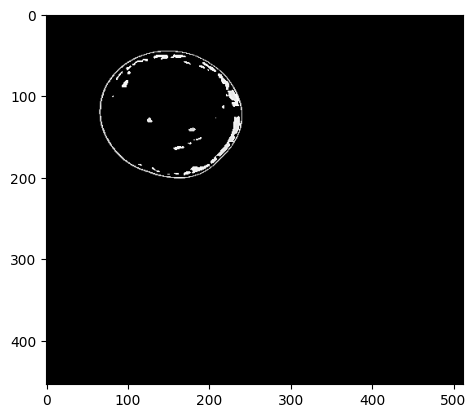

In [75]:

bone_segement_range = (2000, 2900)

fat_mask = dicom_array.copy()
fat_mask = fat_mask.astype(np.int16)
fat_mask[np.logical_or(fat_mask < fat_segement_range[0], fat_mask > fat_segement_range[1])] = 0

plt.imshow(fat_mask[110, :, :], cmap='gray')
plt.show()


In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""